# 🎓 Student Performance Prediction

## 📌 Project Overview
The goal of this project is to build a machine learning model that can **predict a student’s academic performance (final grade)** based on various academic, demographic, and behavioural features.

Educational institutions can use such a system to:
- Identify **students at risk** of poor performance
- Provide **early academic interventions**
- Improve **overall learning outcomes**

## 📊 Problem Statement
Given historical student data containing multiple independent features such as studytime , failures , traveltime, we aim to **predict the final grade of a student**.

Since the target variable (grade) is **continuous**, this is formulated as a **supervised regression problem**.

## 🧠 Machine Learning Approach
The project follows a complete end-to-end machine learning workflow:
1. Data understanding and exploration (EDA)
2. Data preprocessing and feature engineering
3. Handling categorical and numerical features
4. Model training using regression algorithms
5. Model evaluation using appropriate regression metrics
6. Performance comparison and final model selection

## 🎯 Expected Outcome
A well-performing regression model that can accurately predict student grades and provide insights into the most influential factors affecting student performance.

---

## 📦 Importing Required Libraries


In [78]:
# Data manipulation and numerical computations
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visualization style for consistency
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# For better readability of outputs
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


## 📂 Loading the Dataset

The dataset contains information related to students’ academic performance along with several demographic and educational features.  
We begin by loading the dataset into a Pandas DataFrame and performing an initial inspection to understand its structure, size, and feature types.


In [79]:
try:
    df = pd.read_csv("student-mat.csv", sep=";")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: Dataset file not found. Please check the file path.")


Dataset loaded successfully!


## 📊 Dataset Description

The dataset used in this project contains detailed information about students and their academic performance in secondary school.

### 🔢 Dataset Overview
- Each row represents an individual student
- Each column represents a specific student-related feature
- The dataset includes both **numerical** and **categorical** variables

### 🎯 Target Variable
- **`G3`**: Final grade of the student (continuous variable)  
  This is the target variable we aim to predict.


In [80]:
# Checking the dimensions of the dataset
rows, cols = df.shape
print(f"The dataset contains {rows} rows and {cols} columns.")

The dataset contains 395 rows and 33 columns.


In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### 🧾 Dataset Information

This step helps us understand:
- Data types of each feature
- Presence of missing values
- Memory usage of the dataset

This information is crucial for deciding preprocessing steps such as encoding, type conversion, and missing value handling.


In [83]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [84]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


### 🔢 Numerical vs Categorical Features

In [85]:
# Separating features by type
categorical_features = df.select_dtypes(include=["object", "category"]).columns.tolist()
numeric_features = df.select_dtypes(include=np.number).columns.tolist()

print(f"There are {len(numeric_features)} numerical features: {numeric_features}")
print(f"There are {len(categorical_features)} categorical features: {categorical_features}")


There are 16 numerical features: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
There are 17 categorical features: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


## 🔍 Exploratory Data Analysis (EDA)

Before building any predictive model, it is essential to **analyze the dataset for data quality issues** such as missing values and duplicate records.  
This ensures that the data we feed into the model is **clean and reliable**, which directly affects model performance.

### 🧪 Missing Values and Duplicate Records

- **Missing values**: Missing data can introduce bias or reduce model accuracy. We need to identify and handle them before training.  
- **Duplicate records**: Duplicate rows can distort statistical analysis and lead to overfitting. They should be identified and removed if present.


In [86]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [87]:
df.duplicated().sum()

np.int64(0)

### 🔢 Univariate Analysis: Distribution of Numerical Features

We will visualize numerical features using histograms to gain insights into their distribution and spread.


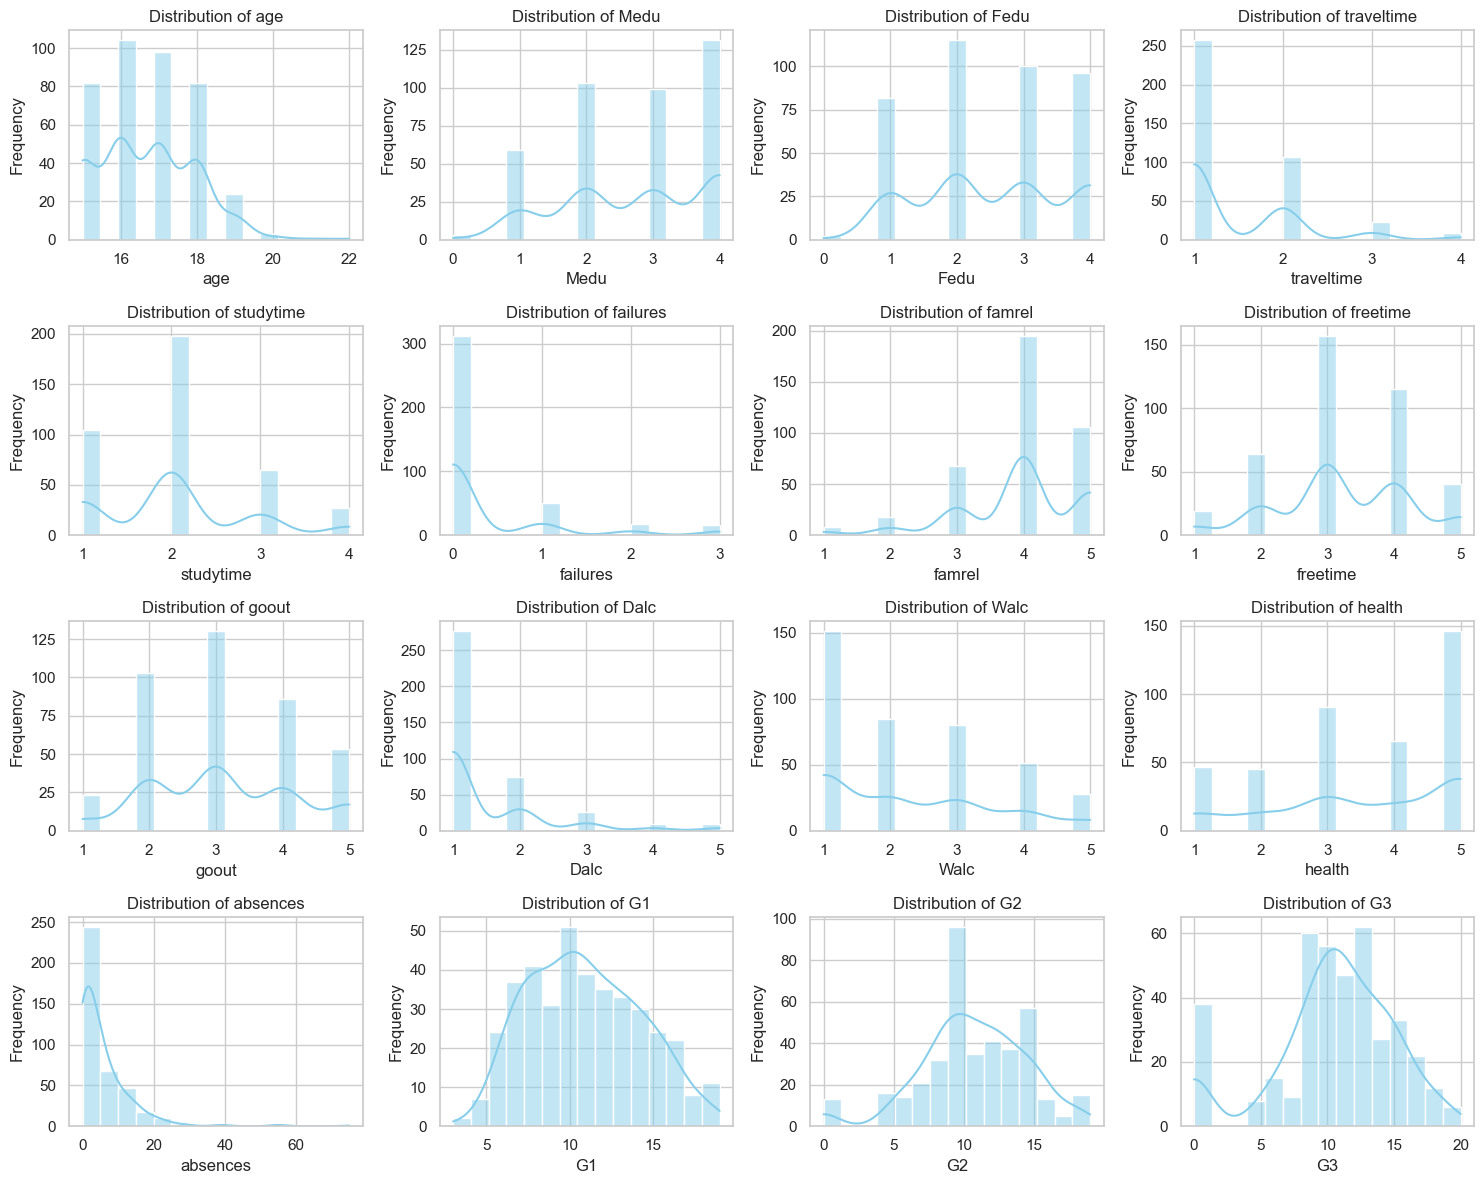

In [88]:
plt.figure(figsize=(15,12))
for i in range(len(numeric_features)):
    col = numeric_features[i]
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], bins=15, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### 📊 Count Plots for Categorical Features

We will visualize each categorical feature using **countplots**.


/var/folders/mh/7th852z51ljdlszsvgw4ht780000gn/T/ipykernel_2006/2948224633.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='pastel')
/var/folders/mh/7th852z51ljdlszsvgw4ht780000gn/T/ipykernel_2006/2948224633.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='pastel')
/var/folders/mh/7th852z51ljdlszsvgw4ht780000gn/T/ipykernel_2006/2948224633.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='pastel')
/var/folders/mh/7th852z51ljdlszsvgw4ht780000gn/T/ipykernel_2006/294822463

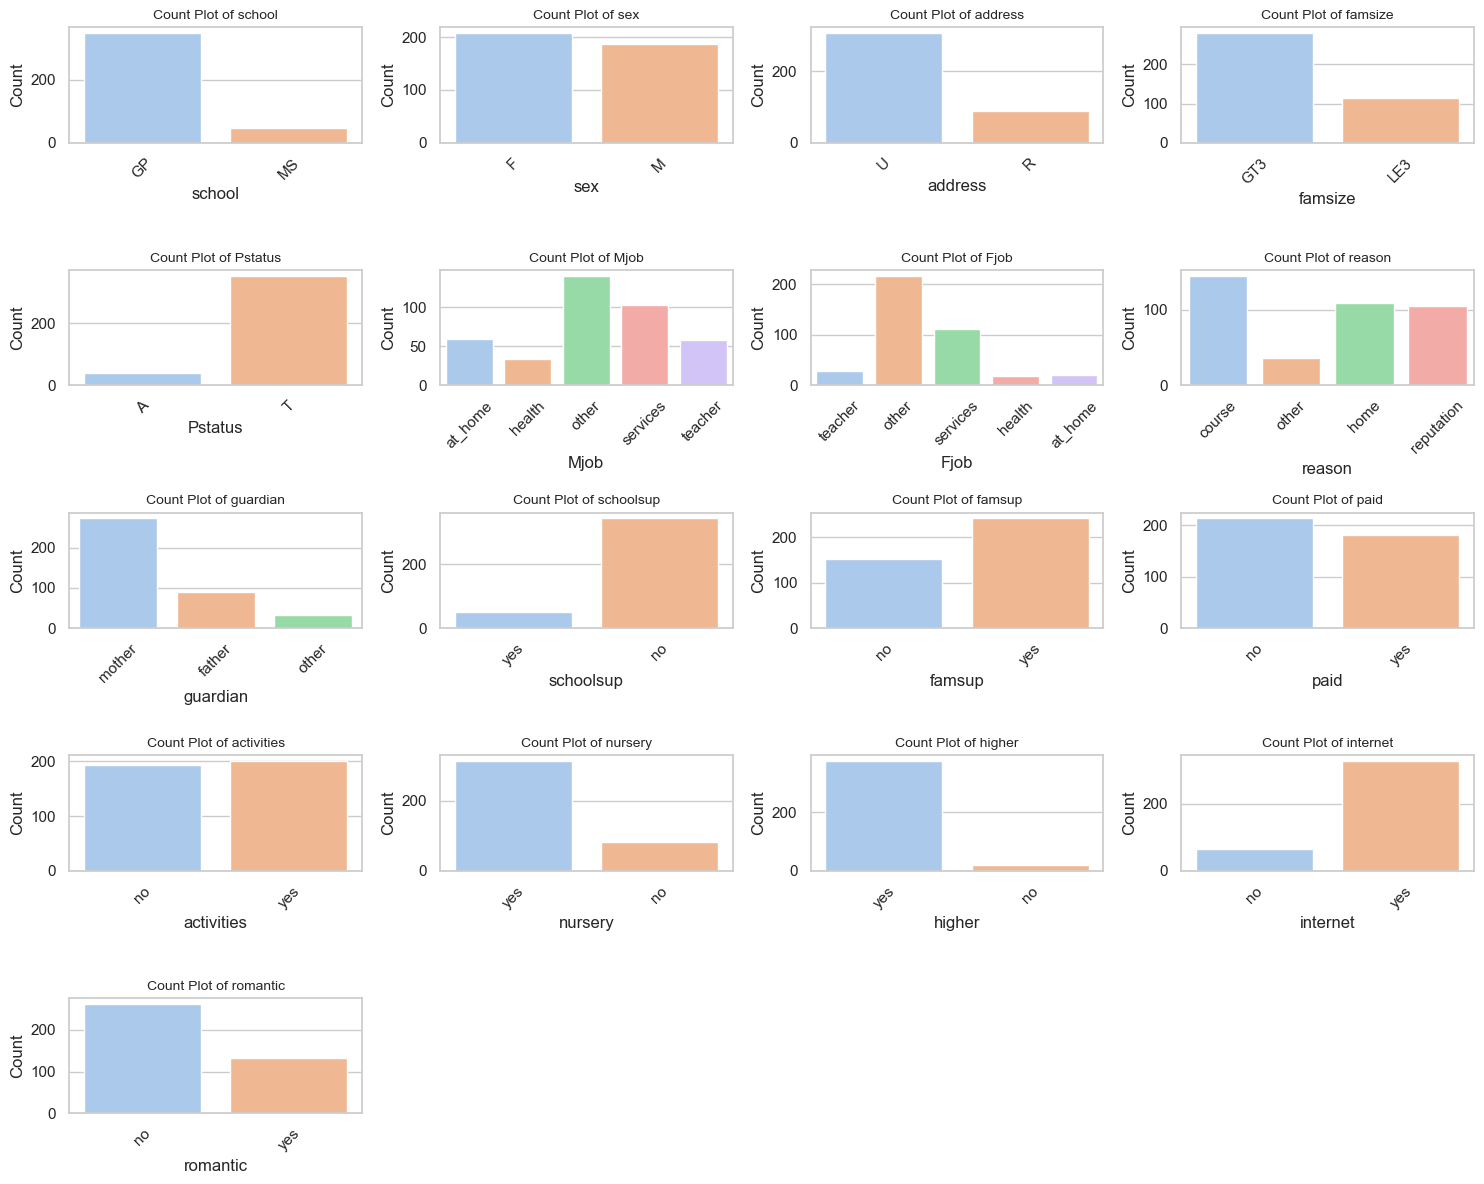

In [89]:
plt.figure(figsize=(15,12))

for i in range(len(categorical_features)):
    col = categorical_features[i]  
    plt.subplot(5,4,i+1)
    sns.countplot(x=df[col], palette='pastel')
    plt.title(f'Count Plot of {col}', fontsize=10)
    plt.xticks(rotation=45)  
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


### 🔗 Correlation Matrix

Correlation analysis helps us understand **linear relationships** between numerical features.  

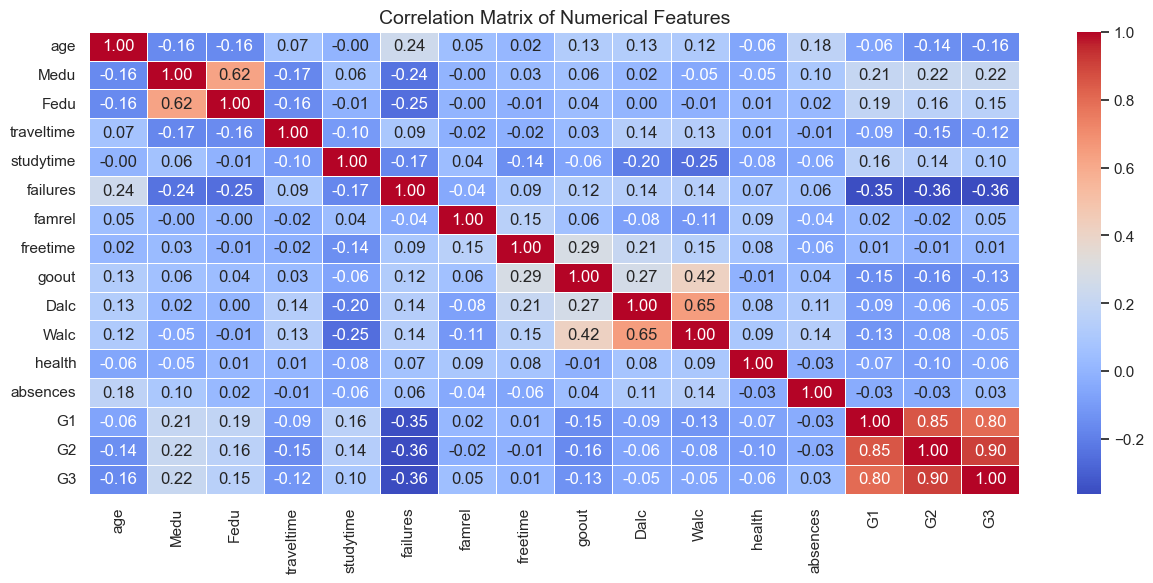

In [90]:
plt.figure(figsize=(15,6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.show()


In [91]:
numeric_features = df.select_dtypes(include=np.number)

cor_target = numeric_features.corr()['G3'].sort_values(ascending=False)

print("Correlation of numerical features with target (G3):\n")
print(cor_target)


Correlation of numerical features with target (G3):

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64


In [92]:
threshold = 0.1
important_features = [col for col in cor_target.index if abs(cor_target[col]) > threshold]
important_features_sorted = sorted(important_features, key=lambda x: abs(cor_target[x]), reverse=True)

print("Important features for predicting G3 (|correlation| > 0.1):")
print(important_features_sorted)


Important features for predicting G3 (|correlation| > 0.1):
['G3', 'G2', 'G1', 'failures', 'Medu', 'age', 'Fedu', 'goout', 'traveltime']


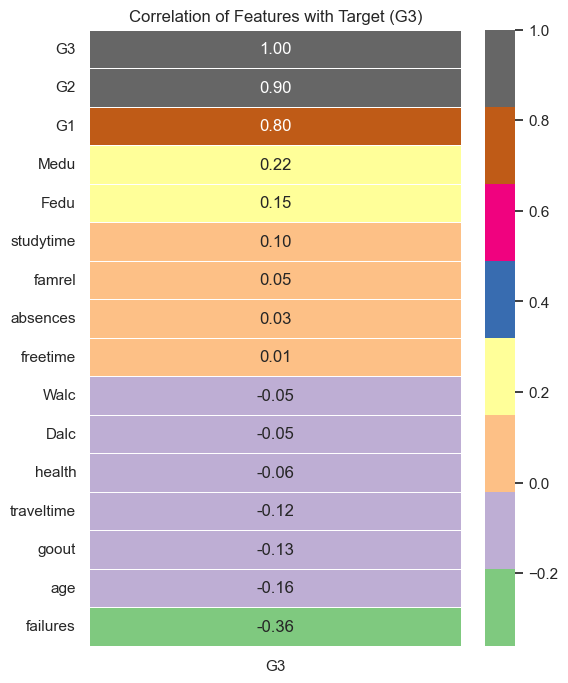

In [93]:
plt.figure(figsize=(6,8))
sns.heatmap(cor_target.to_frame(), annot=True, fmt=".2f", cmap="Accent", linewidths=0.5)
plt.title("Correlation of Features with Target (G3)", fontsize=12)
plt.show()


### 🗑 Removing Less Useful Features

In [94]:
# Dropping less useful features based on correlation analysis
# These features are weakly correlated with G3 or deemed redundant:
# 'school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian'

columns_to_drop = ["school","address","famsize","Pstatus","Mjob","Fjob","reason","guardian"]
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Confirm columns are removed
print("Remaining columns:", df.columns.tolist())


Remaining columns: ['sex', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


### 🏷 Encoding Categorical Variables

Machine learning models require **numerical input**, so categorical features must be converted to numbers.  

#### Approach:
- **Binary categorical features** (2 unique values) → use **Label Encoding**.  
- **Multi-class categorical features** (more than 2 unique values) → use **One-Hot Encoding**.  

This step ensures that all features are numeric and ready for model training.


In [95]:
from sklearn.preprocessing import LabelEncoder
categorical_features = df.select_dtypes(include=["object", "category"]).columns.tolist()
binary_cols = [col for col in categorical_features if df[col].nunique() == 2]
print("Binary categorical features to encode:", binary_cols)

# Apply label encoding
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

Binary categorical features to encode: ['sex', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


### 🎯 Separating Independent and Dependent Features

Before training a machine learning model, we need to separate:

- **Independent features (X)**: All columns that will be used to predict the target  
- **Dependent feature (y)**: The target variable we want to predict (`G3`)

This separation is crucial because machine learning models require **X (features)** and **y (target)** as separate inputs.


In [96]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Confirm shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (395, 24)
Shape of y: (395,)


## 🚦 Train-Test Split

Before training our regression model, we split the dataset into:

- **Training set**: Used to train the model  
- **Test set**: Used to evaluate model performance on unseen data  

This step ensures that our model can **generalize well** and is not overfitting to the training data.


In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (316, 24)
X_test shape: (79, 24)
y_train shape: (316,)
y_test shape: (79,)


## ⚖️ Feature Scaling

Feature scaling is applied to bring all independent features onto a **similar scale**.  
We will use **StandardScaler**, which standardizes features to have **mean=0** and **standard deviation=1**.


In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)


## 🌲 Hyperparameter Tuning: Random Forest Regressor

Random Forest is an ensemble regression model that combines multiple decision trees to improve accuracy and reduce overfitting.  

Hyperparameter tuning is important to:
- Optimize **model performance**
- Control **complexity** (number of trees, depth, etc.)
- Reduce **overfitting or underfitting**


In [101]:
#Randomized search CV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
rf = RandomForestRegressor(random_state=42)

n_estimators = [200,400,600,800,1000]
max_depth = [5,15,20,30]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
max_features = ["sqrt","log2"]
max_samples = [0.5,0.6,0.7,0.9,1.0]
criterion = ['squared_error', 'absolute_error', 'poisson']

parameters = {"n_estimators" : n_estimators,"max_depth": max_depth,"min_samples_split": min_samples_split,"min_samples_leaf": min_samples_leaf,"max_features":max_features,"max_samples":max_samples,"criterion":criterion}

random_search = RandomizedSearchCV(n_jobs=-1,param_distributions=parameters,estimator=rf,n_iter=50,cv=3,scoring="r2",verbose=2,random_state=42)
random_search.fit(x_train, y_train)
# Best parameters and score
print("Best Hyperparameters:", random_search.best_params_)
print("Best CV R2 Score:", random_search.best_score_)

# Evaluate on test set
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(x_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"Test R2 Score: {r2:.3f}")
print(f"Test RMSE: {rmse:.3f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END criterion=poisson, max_depth=30, max_features=log2, max_samples=1.0, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END criterion=squared_error, max_depth=15, max_features=log2, max_samples=1.0, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END criterion=squared_error, max_depth=15, max_features=log2, max_samples=1.0, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END criterion=poisson, max_depth=30, max_features=log2, max_samples=1.0, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END criterion=squared_error, max_depth=15, max_features=log2, max_samples=1.0, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END criterion=poisson, max_depth=30, max_features=log2, max_samples=1.0, min_samples_leaf=4, min_samples_split=5, n_estimators=200; tot

## 📉 Residual Plot

A residual plot shows the **difference between actual and predicted values**:

\[
\{Residual} = y_{\{actual}} - y_{\{predicted}}
\]

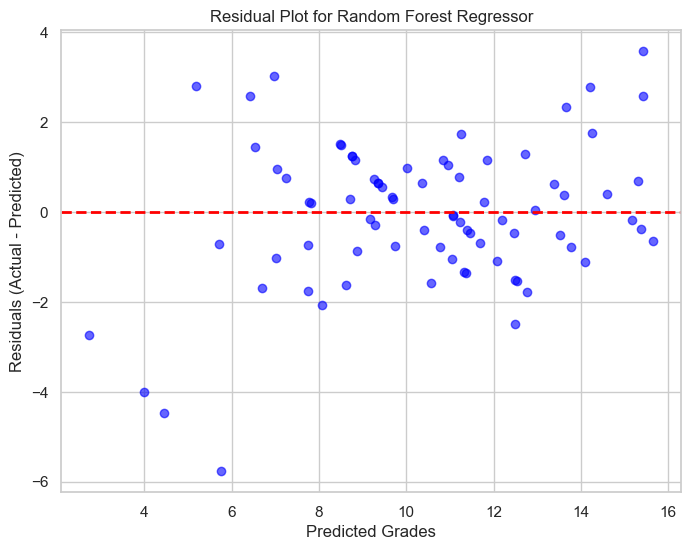

Exception ignored in: <function ResourceTracker.__del__ at 0x106289bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1072d5bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1071adbc0>
Traceback (most recent call last

In [102]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Scatter plot: predicted vs residuals
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Grades")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot for Random Forest Regressor")
plt.show()


## 🌟 Feature Importance

Feature importance tells us **how much each feature contributes to the model's predictions**.  
We will use the **feature_importances_** attribute of the trained Random Forest model.


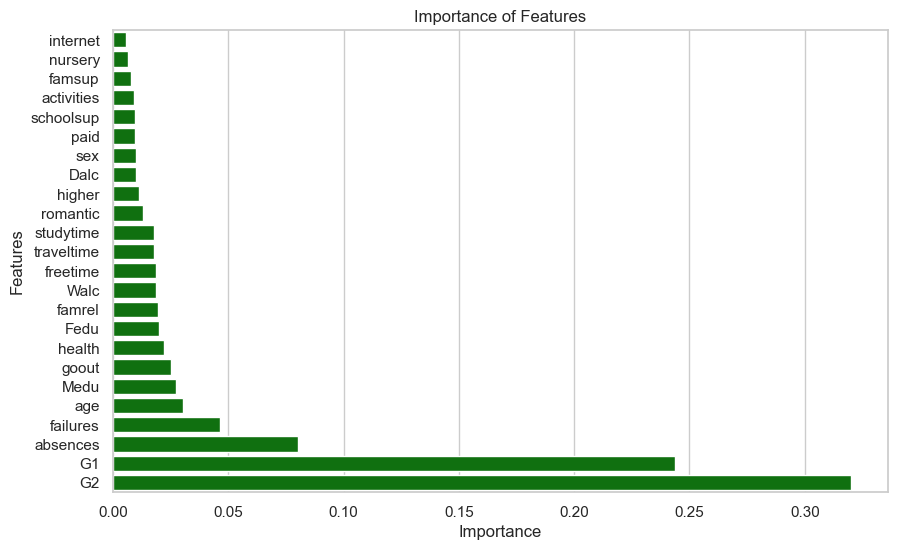

In [104]:
importances = best_rf.feature_importances_
features = df.drop("G3",axis=1).columns 
indices = np.argsort(importances)  # ascending order
sns.barplot(x=importances[indices], y=features[indices], color="green")
plt.title("Importance of Features")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

## Saving the model 

In [105]:
import joblib
# Save the trained model
joblib.dump(best_rf, "student_performance_model.pkl")
# Load the model later
loaded_model = joblib.load("student_performance_model.pkl")